# Introductie

De uitdagingen om patroonherkenning te doen bij gestructureerde data liggen vooral bij:
- Feature selectie
- Feature engineering
- Model selectie
- Explainability
- Data volumes

## Feature selectie
Er zijn om te beginnen vaak een groot aantal variabelen die in aanmerking komen om nuttige patronen te herkennen (leeftijd, geslacht, etc.).
Wanneer we die allemaal in features vertalen, is het _niet_ zo dat elk van die features effectief bijdraagt tot een betere patroonherkenning. Sommige features zijn ook zodanig **statistisch gecorreleerd**,
dat het moeilijk is om te beslissen welke features nu net wél of niet belangrijk zijn om in verband te brengen met de parameters van het model (bv. leeftijd vs. lengte).

:::{note} Statistische correlatie
**In de statistiek verwijst correlatie naar elke statistische relatie, causaal of niet, tussen twee willekeurige variabelen. Hoewel "correlatie" in de breedste zin elk type associatie kan aanduiden, verwijst het in de statistiek gewoonlijk naar de mate waarin een paar variabelen lineair gerelateerd zijn**.
:::

Desalniettemin is het belangrijk voor de bruikbaarheid van de ML oplossing om _zuinig te zijn met het aantal features_. _Iedere feature die om een model parameter wordt gemapped, moet immers ook in productie telkens (betrouwbaar ⚠️) aanwezig zijn_. **Feature selectie verwijst algemeen naar het proces waarbij op zoek gegaan wordt naar dé bepalende features voor betrouwbare patroonherkenning in een bepaalde context**.

## Feature engineering
### Meetschaal
Naast de hoeveelheid features is hun **heterogeniteit qua meetschaal** ook vaak een significante uitdaging:
- **Nominaal**: De informatie laat toe om items in bepaalde categorieën te plaatsen (bv. "fruit" $\neq$ "groente" $\neq$ "vlees" $\neq$ "rond" $\neq$ "vierkant" $\neq$ $\ldots$)
- **Ordinaal**: De informatie laat toe om items te ordenen (bv. "small" $<$ "medium" $<$ "large")
- **Interval**: De informatie laat toe om de afstand tussen items te bepalen (bv. $45\degree - 10\degree = 5\degree - (-30\degree)$)
- **Ratio**: De informatie laat toe om de verhoudingen tussen items te bepalen (bv. $\frac{120km/h}{60km/h} = \frac{30km/h}{15km/h}$)
### (On)volledigheid
De data zijn in veel gevallen onvolledig (met verschillende gradaties per feature) en er moet dus nagedacht worden over hoe om te gaan met **_missing data_**.
### (On)gebalanceerdheid
**Ongebalanceerdheid** van data verwijst naar het fenomeen waarbij **bepaalde categorieën (bv. man/vrouw) of continue waarden (bv. leeftijden) over- of ondervertegenwoordigd zijn in de data**. Als de training data ongebalanceerd is met betrekking tot bepaalde features, geven ze geen realistisch beeld van de verdeling van de data in de echte wereld en kan het zijn dat het model verkeerde parameterwaarden leert. Wanneer we het model dan in productie zetten, kan het zijn dat we heel slechte prestaties zien, terwijl de prestaties met de **training, validatie en test data** zeer goed waren.
#### Terminologieën
- Wanneer de training data geen realistisch beeld geven van de werkelijke verdeling (of _distributie_) van feature-waarden in de werkelijkheid, zeggen we dat ze **"onrepresentatief"** zijn.
- **Training**, **validatie** en **test data** verwijst naar de standaard praktijk in ML om de training data in drie delen op te splitsen:
    - **Training data**: dit is de bulk van de data waarmee we ons leeralgorithme effectief voeden (bv. 70%).
    - **Validatie data**: dit is een kleiner stuk van de data waarmee we _tijdens de training en hyper parameter tuning_ nagaan hoe het leren verbeterd (bv. 20%).
    - **Test data**: dit is een (meestal nog) kleiner stuk van de data dat volledig opzij gehouden wordt (bv. 10%). Het model kan deze data dus op geen enkel moment tijden de training "zien". Ze dienen om de **generalisatie** capaciteit van het model te kwantificeren.
- **Generalisatie**: Deze term verwijst naar de capaciteit van het model om patronen te herkennen op nieuwe data.

## Model selectie
ML wordt in het algemeen bemoeilijkt bij complexe patronen en in het geval van gestructureerde data is het in die context vaak zo dat de patronen waar we naar op zoek zijn niet in simpele lineaire relaties uit te drukken zijn. Pure lineaire modellen schieten dan ook heel vaak te kort. Soms kan die opgevangen worden aan de hand niet-lineaire feature transformaties (bv. log- en cyclische transformaties), maar ook die technieken schieten vaak te kort. Het vinden van de juiste benadering qua modelleren is daardoor in veel gevallen ook niet triviaal.

## _Explainability_
Bij gestructureerde data is het vaak zo dat ML problemen zich in een context situreren waar het belangrijk is om **de uiteindelijk geleerde partronen in parameters te kunnen uitleggen**. Dit is absoluut het geval in de context van _Business Intelligence (BI)_ toepassingen.

## Data volumes
### Big data
Naast grote keuze uit potentiële features, beschikken bedrijven en organisaties tegenwoordig vaak over hele grote hoeveelheden historische metingen van variabelen. Ook daar kan het belangrijk zijn om een selectie te doen (bv. omdat het geen nut heeft om naar _te oude_ data te kijken). Er is ook een technische uitdaging om met **hele grote volumes data** om te gaan. Sommige modelleertechnieken lenen zich daar beter toe dan andere omdat de berekeningen gedistribueerd kunnen uitgevoerd worden op een cluster van servers (zie bv. [SparkMLlib](https://spark.apache.org/docs/latest/ml-guide.html)).
### ⚠️ _Overfitting_
De verhouding tussen het aantal trainingdata en het aantal model parameters is misschien wel een van de belangrijkste uitdagingen voor ML in het algemeen. Bij gestructureerde data, zeker wanneer ze niet per se _big_ zijn, is het echter altijd een aandachtspunt. Bij de bespreking van features zagen we reeds dat iedere parameter van een model gelinkt is aan één of meerdere zogenaamde input features. Naarmate we meer potentiële features hebben, kunnen we ook meer parameters toevoegen om zo complexere patronen te leren herkennen. Als we echter evenveel (of meer) parameters toevoegen dan er voorbeelden zijn (denk: rijen in de training data), zal een leerlargorithme in staat zijn om de individuele data perfect te mappen op de model parameters. Het algorithme heeft in dat geval geen patroon geleerd, maar wel de data in zijn geheel.  
  
De illustratie hieronder geeft weer wat er gebeurt wanneer we bij een lineair regressie probleem met een _bias_ en _slope_ parameter, slechts twee datapunten zouden gebruiken om de parameters te schatten. In dat geval leert het model perfect de training data te voorspellen, maar het is duidelijk dat het geleerde patroon helemaal niet overeenkomt met het werkelijke.

**Overfitting** verwijst naar het fenomeen waarbij het model verhoudingsgewijs te veel parameters heeft tegenover de hoeveelheid voorbeelden in de training data waaruit het leeralgoritme de optimale parameterwaarden schat. Hierdoor krijgen we **een getrained model dat te veel eigen wordt aan de specifieke training data en te weinig generaliseert naar ongeziene data**.

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

from ml_courses.sim.monte_carlo_tips import MonteCarloTipsSimulation

☕ COFFEE SHOP TIPPING ANALYSIS
True relationship: Tip = $0.50 + 15.0% × Order Total
We collected data from 50 customers
Order range: $3.96 - $24.46
Tip range: $0.21 - $4.23


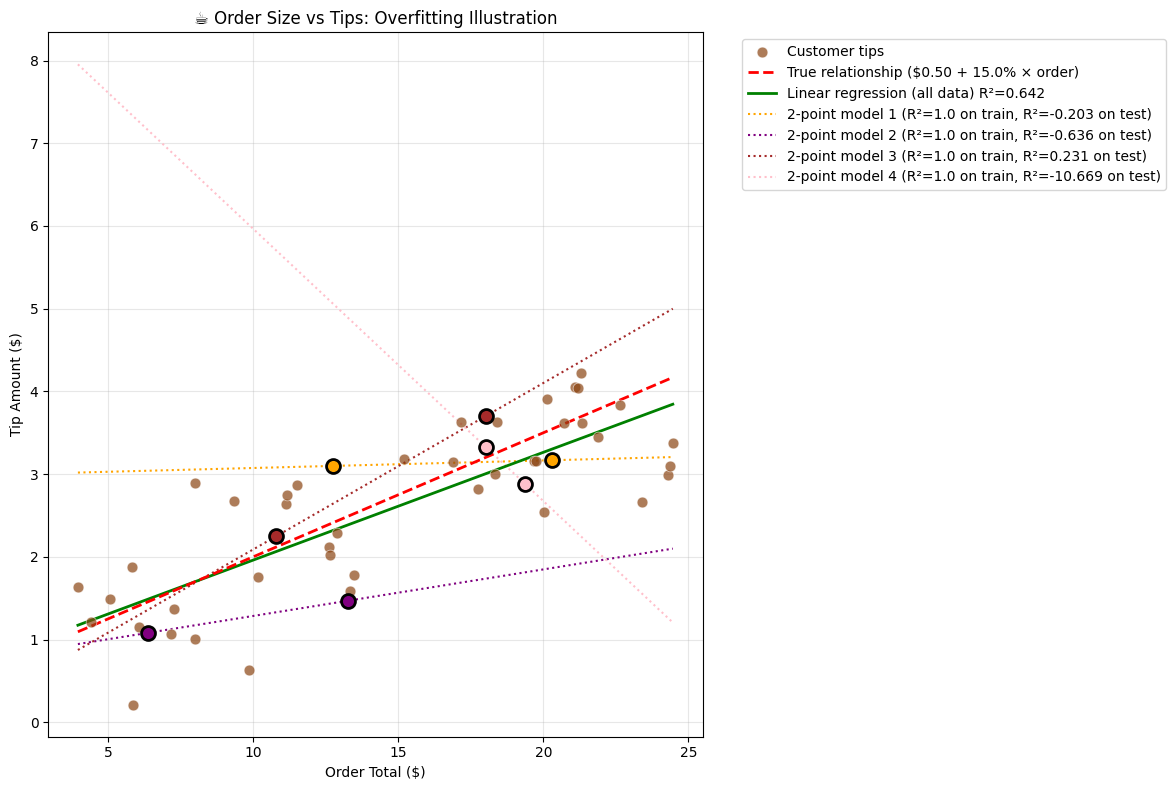

In [19]:
sim = MonteCarloTipsSimulation(noise_std=0.8)

print("☕ COFFEE SHOP TIPPING ANALYSIS")
print(f"True relationship: Tip = ${(sim.true_b1):.2f} + {sim.true_b2:.1%} × Order Total")
print(f"We collected data from {sim.n_customers} customers")
print(f"Order range: ${sim.order_totals.min():.2f} - ${sim.order_totals.max():.2f}")
print(f"Tip range: ${sim.observed_tips.min():.2f} - ${sim.observed_tips.max():.2f}")


# Linear regression function
def linear_regression(x, y):
    """Calculate linear regression parameters using least squares."""
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    b2 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
    b1 = y_mean - b2 * x_mean

    return b1, b2


# Calculate R² for training and test data
def calculate_r2(y_true, y_pred):
    """Calculate R² coefficient of determination."""
    return r2_score(y_true, y_pred)


# Plot the coffee shop data with overfitting illustration
plt.figure(figsize=(12, 8))

# Plot customer tips
plt.scatter(
    sim.order_totals,
    sim.observed_tips,
    alpha=0.7,
    color="saddlebrown",
    s=60,
    edgecolor="white",
    linewidth=0.5,
    label="Customer tips",
    zorder=5,
)

# True relationship line
plt.plot(
    sim.order_totals,
    sim.true_tips,
    "r--",
    linewidth=2,
    label=f"True relationship (${sim.true_b1:.2f} + {sim.true_b2:.1%} × order)",
    zorder=4,
)

# Linear regression on all data
b1_all, b2_all = linear_regression(sim.order_totals, sim.observed_tips)
tips_pred_all = b1_all + b2_all * sim.order_totals
r2_all = calculate_r2(sim.observed_tips, tips_pred_all)

plt.plot(
    sim.order_totals,
    tips_pred_all,
    "g-",
    linewidth=2,
    label=f"Linear regression (all data) R²={r2_all:.3f}",
    zorder=3,
)

# Multiple 2-point regression lines to illustrate overfitting
rng = np.random.default_rng(67)
colors = ["orange", "purple", "brown", "pink"]

for i in range(4):
    # Randomly select 2 points
    indices = rng.choice(len(sim.order_totals), 2, replace=False)
    x_train = sim.order_totals[indices]
    y_train = sim.observed_tips[indices]

    # Fit linear regression on 2 points
    b1_2pt, b2_2pt = linear_regression(x_train, y_train)

    # Calculate predictions on all data
    tips_pred_2pt = b1_2pt + b2_2pt * sim.order_totals

    # Calculate R² on training data (will be 1.0)
    r2_train = calculate_r2(y_train, b1_2pt + b2_2pt * x_train)

    # Calculate R² on all data (will be low)
    r2_test = calculate_r2(sim.observed_tips, tips_pred_2pt)

    # Plot the 2-point regression line
    plt.plot(
        sim.order_totals,
        tips_pred_2pt,
        linestyle=":",
        color=colors[i],
        linewidth=1.5,
        label=f"2-point model {i + 1} (R²={r2_train:.1f} on train, R²={r2_test:.3f} on test)",
        zorder=2,
    )

    # Highlight the training points
    plt.scatter(x_train, y_train, color=colors[i], s=100, edgecolor="black", linewidth=2, zorder=6)

plt.xlabel("Order Total ($)")
plt.ylabel("Tip Amount ($)")
plt.title("☕ Order Size vs Tips: Overfitting Illustration")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()